# How do our data-structures scale?

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
from collections import Counter
import functools, operator, random, itertools

import pyphi
from pyphi.examples import basic_noisy_selfloop_network
import pyphi.data_models as dm  # Prototype code

In [2]:
nn = list('ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz') # for node names

N = 10 # number of Nodes in system
C = 5 # maximum number of Connections from a node to downstream nodes
S = 3 # number of States per node

labels = nn[:N]
nodes = [(l,S) for l in labels] # node (Label, NumStates)

print(f'''
{N} # number of Nodes
{C} # maximum number of Connections from a node
{S} # number of States per node
{labels} # node labels
''')


10 # number of Nodes
5 # maximum number of Connections from a node
3 # number of States per node
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'] # node labels



In [3]:
am = np.zeros((N,N))
cm = dm.CM(am=am,node_labels=labels)

# Create random associations from each node to C others
for r in labels: cm.df.loc[r,random.sample(labels,C)] = 1
png=f'C_{C}.png'
cm.graph(pngfile=png)
#Image(filename=png)
cm.df

,A,B,C,D,E,F,G,H,I,J
A,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
B,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
C,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
D,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
E,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
F,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
G,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
H,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
I,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
J,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


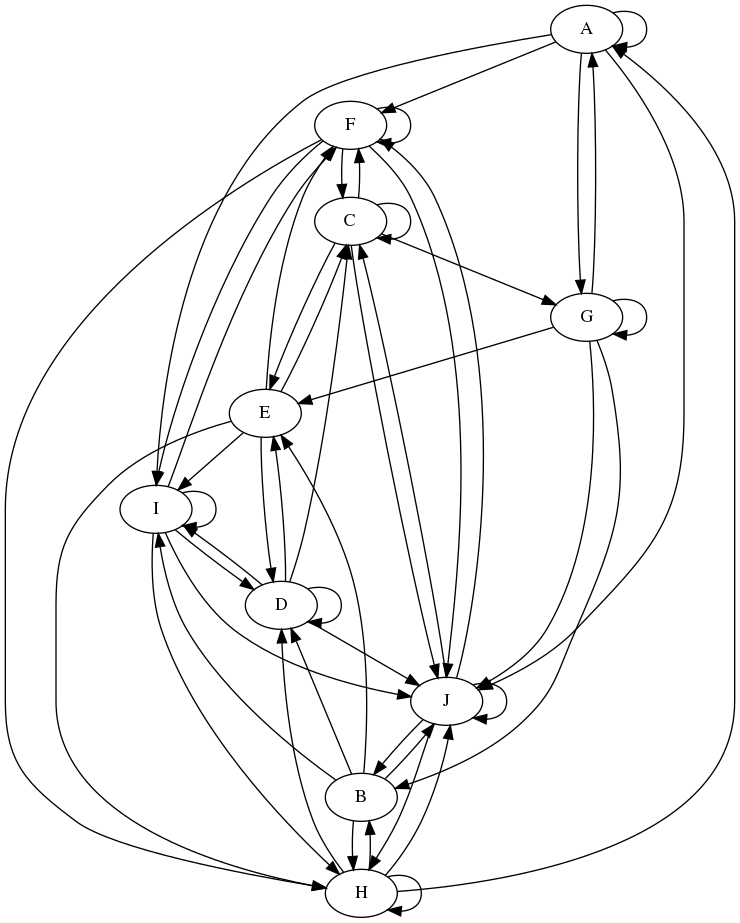

In [4]:
Image(filename=png, width=500)

In [5]:
p=np.random.random((S**N,S**N))
tp = dm.TransProb(in_nodes=nodes,out_nodes=nodes,probabilities=p)
tp.df  # state-to-state Transition Probabilities

,0000000000,0000000001,0000000002,0000000010,0000000011,0000000012,0000000020,0000000021,0000000022,0000000100,...,2222222122,2222222200,2222222201,2222222202,2222222210,2222222211,2222222212,2222222220,2222222221,2222222222
0000000000,0.236555,0.759078,0.016287,0.952752,0.388166,0.230969,0.377498,0.489841,0.797573,0.290596,...,0.826881,0.856119,0.344953,0.550798,0.261362,0.417055,0.213685,0.493789,0.931793,0.700396
0000000001,0.509595,0.787709,0.031266,0.980669,0.774176,0.825270,0.750676,0.695713,0.667164,0.635907,...,0.927947,0.689977,0.233294,0.191473,0.704931,0.134691,0.805416,0.863487,0.488440,0.814902
0000000002,0.721414,0.382549,0.479762,0.001346,0.028310,0.321248,0.129405,0.549774,0.193831,0.954915,...,0.573124,0.384743,0.175239,0.375459,0.294998,0.359799,0.050649,0.758529,0.736125,0.289057
0000000010,0.105731,0.558399,0.543691,0.822255,0.726762,0.171009,0.995576,0.137904,0.279485,0.190505,...,0.613290,0.797815,0.125693,0.851571,0.803852,0.282490,0.767369,0.970208,0.720477,0.620261
0000000011,0.078671,0.331576,0.630441,0.632760,0.629250,0.134123,0.163142,0.113166,0.513362,0.275403,...,0.888595,0.299150,0.409977,0.368595,0.673731,0.415952,0.620428,0.601599,0.880187,0.163798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222222211,0.395236,0.847240,0.296474,0.502962,0.785804,0.675943,0.700138,0.951860,0.670412,0.593814,...,0.154740,0.285560,0.495866,0.367253,0.177245,0.403686,0.590653,0.007587,0.128253,0.392827
2222222212,0.668189,0.559698,0.330537,0.780952,0.018989,0.954685,0.233525,0.775974,0.680306,0.805576,...,0.403178,0.375773,0.104857,0.482256,0.199450,0.849268,0.922528,0.032305,0.236076,0.285823
2222222220,0.394015,0.821076,0.807375,0.001570,0.274923,0.843199,0.800301,0.202115,0.310004,0.923265,...,0.515166,0.345261,0.115474,0.095386,0.887578,0.287747,0.222247,0.680520,0.211437,0.425387
2222222221,0.296300,0.226584,0.750261,0.982175,0.992521,0.842138,0.018016,0.326231,0.800632,0.649423,...,0.964233,0.271751,0.521592,0.826819,0.656842,0.140803,0.540732,0.445357,0.939759,0.886581


In [6]:
net = dm.Network(tp=tp, cm=cm)
print(net)

Network(7f703a7a77f): node_connectivity: (10, 10), transitions: (59049, 59049)
